# Insurance Forecast by using Linear Regression


## Content the DataSet
### Columns

- Age: age of primary beneficiary

- Sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- Children: Number of children covered by health insurance / Number of dependents

- Smoker: Smoking

- Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- Charges: Individual medical costs billed by health insurance

## Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset
df =pd.read_csv("../input/insurance/insurance.csv")

In [3]:
# look the data set
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# looking the shape DataSet
df.shape

(1338, 7)

In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking null value 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# look  describe data set
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [8]:
# How much the percentage - Gender at the dataset
df["sex"].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [9]:
# How much the percentage - Smoker at the dataset
df["smoker"].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [10]:
# How much the percentage - region at the dataset
df["region"].value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

## Let's make some visualisation

In [11]:
px.scatter(df,x="age",y="charges",color="sex",animation_frame="smoker",size="children")

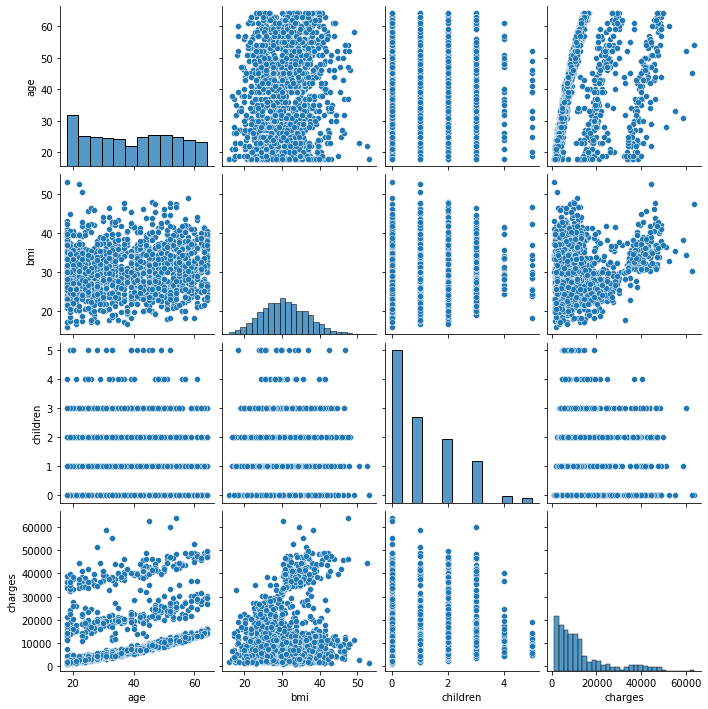

In [12]:
sns.pairplot(df)


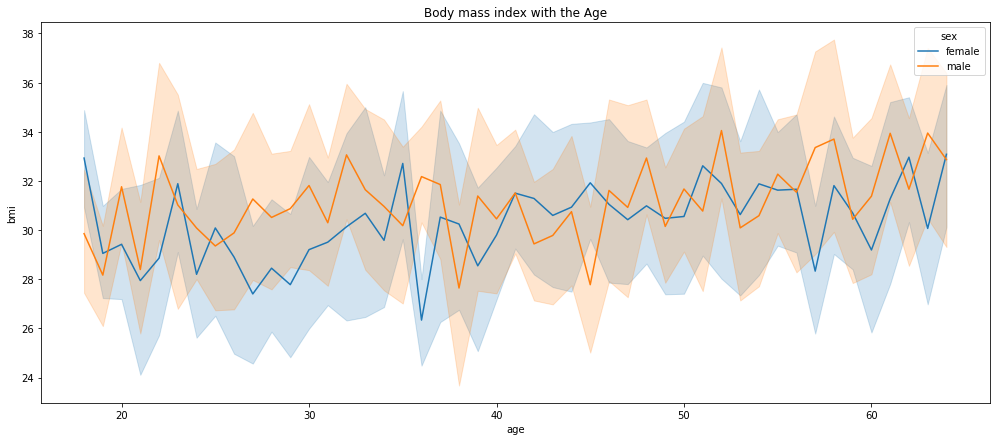

In [13]:
plt.figure(figsize=(17,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex")
plt.title("Body mass index with the Age")
plt.show()

### we see the values Body mass in the Male higher than the female

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

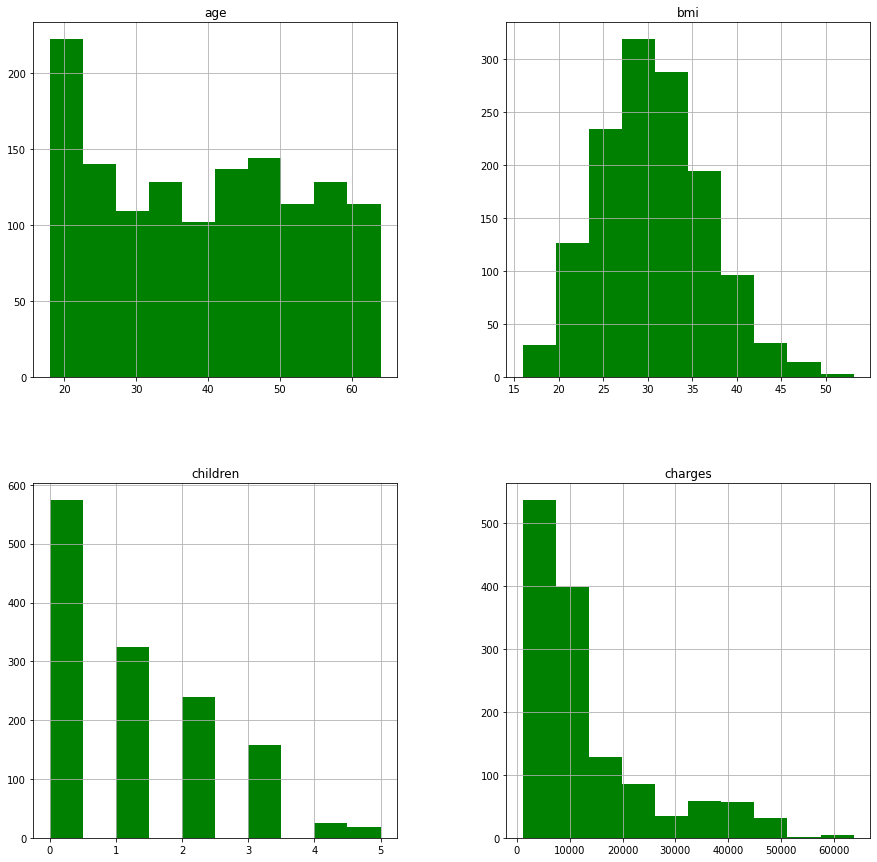

In [14]:
# Data Visualization with histogram 
df[['age',  'bmi', 'children', 'charges']].hist(bins=10, figsize=(15,15),color='green')

In [15]:
df.groupby("region")["charges"].sum().round(2)

region
northeast    4343668.58
northwest    4035712.00
southeast    5363689.76
southwest    4012754.65
Name: charges, dtype: float64

In [16]:
# let making group by
display(df.groupby(["sex","smoker","region"])["charges"].mean().round(2))

sex     smoker  region   
female  no      northeast     9640.43
                northwest     8787.00
                southeast     8440.21
                southwest     8234.09
        yes     northeast    28032.05
                northwest    29670.82
                southeast    33034.82
                southwest    31687.99
male    no      northeast     8664.04
                northwest     8320.69
                southeast     7609.00
                southwest     7778.91
        yes     northeast    30926.25
                northwest    30713.18
                southeast    36029.84
                southwest    32598.86
Name: charges, dtype: float64

## After take knowledge about the data let start building model

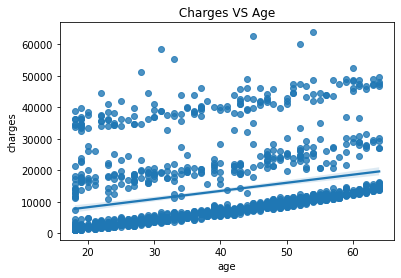

In [17]:
sns.regplot(x='age', y='charges', data=df)
plt.title(' Charges VS Age ')
plt.show()

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
sex=pd.get_dummies(df["sex"],drop_first=True)

In [20]:
smoker=pd.get_dummies(df["smoker"],drop_first=True)
region=pd.get_dummies(df["region"],drop_first=True)

In [21]:
# make concat
df["Smoker"]=smoker


In [22]:
df["Sex"]=sex

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Smoker,Sex
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [24]:
df_new =df.drop(columns=["sex","region","smoker"])
df_new.head()

,age,bmi,children,charges,Smoker,Sex
0,19,27.900,0,16884.92400,1,0
1,18,33.770,1,1725.55230,0,1
2,28,33.000,3,4449.46200,0,1
3,33,22.705,0,21984.47061,0,1
4,32,28.880,0,3866.85520,0,1


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   Smoker    1338 non-null   uint8  
 5   Sex       1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(2)
memory usage: 44.6 KB


<AxesSubplot:>

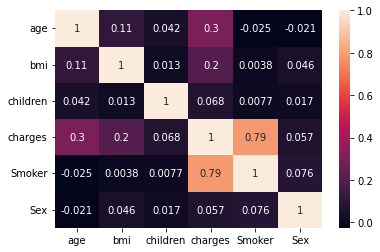

In [26]:
sns.heatmap(df_new.corr(),annot=True)

In [27]:
#Defined X value and y value 

X = df_new.drop(['charges'],axis=1)
y = df_new.charges

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)

In [28]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (1003, 5)
X Test :  (335, 5)
Y Train :  (1003,)
Y Test :  (335,)


In [29]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=model.predict(X_test)
y_pred

array([ 5777.84852442, 28378.56162864, 11507.26126214, 12199.14395411,
       24343.6315973 ,  6900.08017276, 14197.13710647, 30008.44250207,
       12170.51417607, 31605.96437715, 33471.9880474 , 12113.25226202,
       14028.12704259, 10957.96298219, 13122.90671155,  6682.71593547,
        6531.61379489, 38429.84641032, 35234.38882123,  7806.8977214 ,
       12596.7979659 ,  2187.34361764,  5857.68948865, 32661.92328014,
       14220.68903043, 25479.62067211, 14486.89841668,  2022.41209063,
        7122.42238453,  9246.09907765, 30281.81832792,  9080.57496063,
       31631.53214004, 36305.92349131, 23017.83209879,   501.59907324,
       14372.67284823, 10645.42981078,  9600.16366392, 16830.67128228,
        8043.45641784, 13042.55953286,  8519.65116182,  7554.92648087,
        1283.39645211,  9792.0171566 ,  3252.70991986, 27582.34079712,
        6213.51500491, 10076.23755683, 14409.22294383, 25386.11521282,
        8584.04415821, 11207.20939926,  9098.63791326,   726.21642292,
      

In [31]:
y_train

404      3260.19900
801     14313.84630
436      2254.79670
335     13822.80300
644     18806.14547
           ...     
1330    12629.16560
1016     2709.24395
165     10407.08585
7        7281.50560
219     25081.76784
Name: charges, Length: 1003, dtype: float64

In [32]:
mean_absolute_error(y_test,y_pred)

4285.429160989957

In [33]:
model.score(X,y)

0.7495761818227271

### Thank you for reading! 🙂

# Give an upvote.

## The End 